# Amazon Sales Report Project - Internship

In [1]:
#import all neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# first, loading the dataset
df = pd.read_csv(r'C:\Users\dines\OneDrive\Desktop\Amazon Sale Report.csv')

In [3]:
# data cleaning process
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)
df.dropna(subset=['order_id', 'amount'], inplace=True)
df = df.dropna(subset=['date'])
df['date'] = pd.to_datetime(df['date'], format= '%m/%d/%Y', errors='coerce')


## Sales Overview

In [4]:
#sales overview
print("\n Sales Overview")
print("Total Revenue:", df['amount'].sum())
print("Total Orders:", df['order_id'].nunique())

# Monthly sales trend
df['month'] = df['date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month')['amount'].sum()

# Sales by Order Status
status_sales = df.groupby('status')['amount'].sum()


 Sales Overview
Total Revenue: 78496786.39
Total Orders: 112887


## Product Analysis

In [5]:
# product analysis
print("\n product analysis")
category_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False)
print("Top Product Categories:\n", category_sales.head(10))

qty_by_category = df.groupby('category')['qty'].sum().sort_values(ascending=False)
print("Quantity Sold by Category:\n", qty_by_category.head(10))

size_distribution = df['size'].value_counts()
print("Size Distribution:\n", size_distribution)





 product analysis
Top Product Categories:
 category
T-shirt     39154132.17
Shirt       21269768.70
Blazzer     11208506.12
Trousers     5341305.30
Perfume       789419.66
Wallet        458408.18
Socks         150397.50
Shoes         123933.76
Watch            915.00
Name: amount, dtype: float64
Quantity Sold by Category:
 category
T-shirt     45164
Shirt       44903
Blazzer     13930
Trousers     9885
Perfume      1051
Wallet        844
Socks         397
Shoes         152
Watch           3
Name: qty, dtype: int64
Size Distribution:
 size
M       20948
L       20461
XL      19394
XXL     16767
S       15630
3XL     13870
XS      10180
Free     2130
6XL       705
5XL       526
4XL       408
Name: count, dtype: int64


## Fulfilment Analysis

In [6]:
print("\n Fulfilment Analysis")
fulfilment_orders = df['fulfilment'].value_counts()
print("Order Count by Fulfilment Method:\n", fulfilment_orders)

fulfilment_revenue = df.groupby('fulfilment')['amount'].sum()
print("Revenue by Fulfilment Method:\n", fulfilment_revenue)



 Fulfilment Analysis
Order Count by Fulfilment Method:
 fulfilment
Amazon      83542
Merchant    37477
Name: count, dtype: int64
Revenue by Fulfilment Method:
 fulfilment
Amazon      54262165.00
Merchant    24234621.39
Name: amount, dtype: float64


## Customer Segmentation

In [7]:
#customer segmentation
print("\n Customer Segmentation")
rfm =df.groupby('order_id').agg({
    'date': lambda x: (df['date'].max() - x.max()).days,
    'order_id': 'count',
    'amount': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm.describe)



 Customer Segmentation
<bound method NDFrame.describe of                      Recency  Frequency  Monetary
order_id                                         
171-0000547-8192359      NaN          1     301.0
171-0000902-4490745      NaN          1     544.0
171-0001409-6228339      NaN          1     422.0
171-0003082-5110755      NaN          1     563.0
171-0003738-2052324      NaN          1     379.0
...                      ...        ...       ...
408-9997972-0411544      NaN          1       0.0
408-9998736-9918719      NaN          1     499.0
408-9999130-5667563      NaN          1       0.0
408-9999627-9451551      NaN          1     487.0
408-9999949-3394756      NaN          1     574.0

[112887 rows x 3 columns]>


## Geographical Analysis

In [8]:
# geographical analysis
print("\n Geographical Analysis ")

# Sales by ship-city
ship_city_sales = df.groupby('ship-city')['amount'].sum().sort_values(ascending=False)
print("Top Ship-Cities by Sales:\n", ship_city_sales.head(10))

# Sales by ship-state
ship_state_sales = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False)
print("Top Ship-States by Sales:\n", ship_state_sales.head(10))


 Geographical Analysis 
Top Ship-Cities by Sales:
 ship-city
BENGALURU    6836614.65
HYDERABAD    4941790.25
MUMBAI       3696704.04
NEW DELHI    3608277.78
CHENNAI      3098745.74
PUNE         2337978.18
KOLKATA      1412815.87
GURUGRAM     1220562.74
THANE        1003878.29
LUCKNOW       933926.34
Name: amount, dtype: float64
Top Ship-States by Sales:
 ship-state
MAHARASHTRA       13318966.38
KARNATAKA         10465387.03
TELANGANA          6909670.08
UTTAR PRADESH      6814126.08
TAMIL NADU         6510503.73
DELHI              4228503.97
KERALA             3821997.58
WEST BENGAL        3503223.44
ANDHRA PRADESH     3214859.86
HARYANA            2879146.99
Name: amount, dtype: float64


## Visualizations

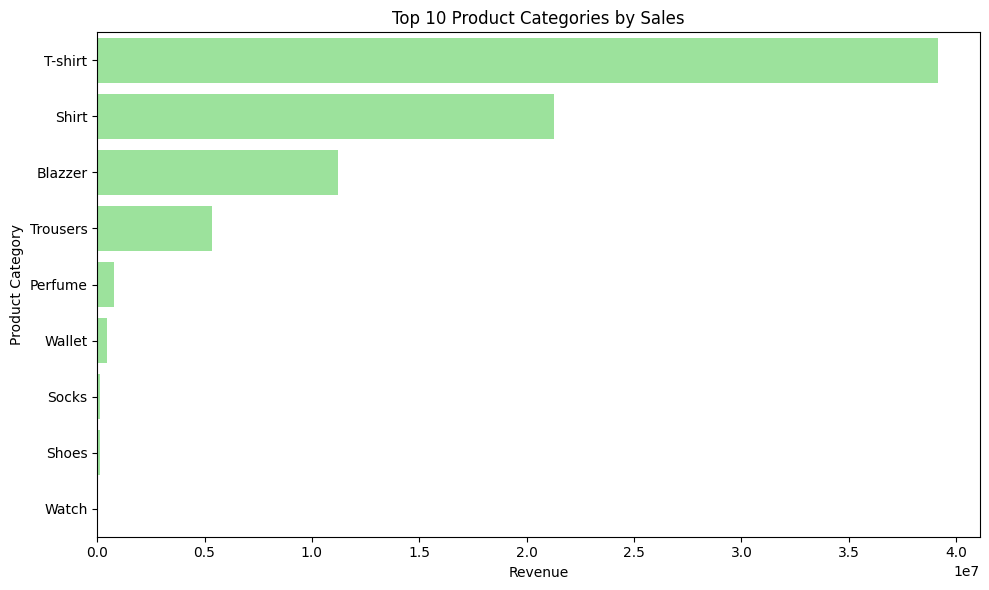

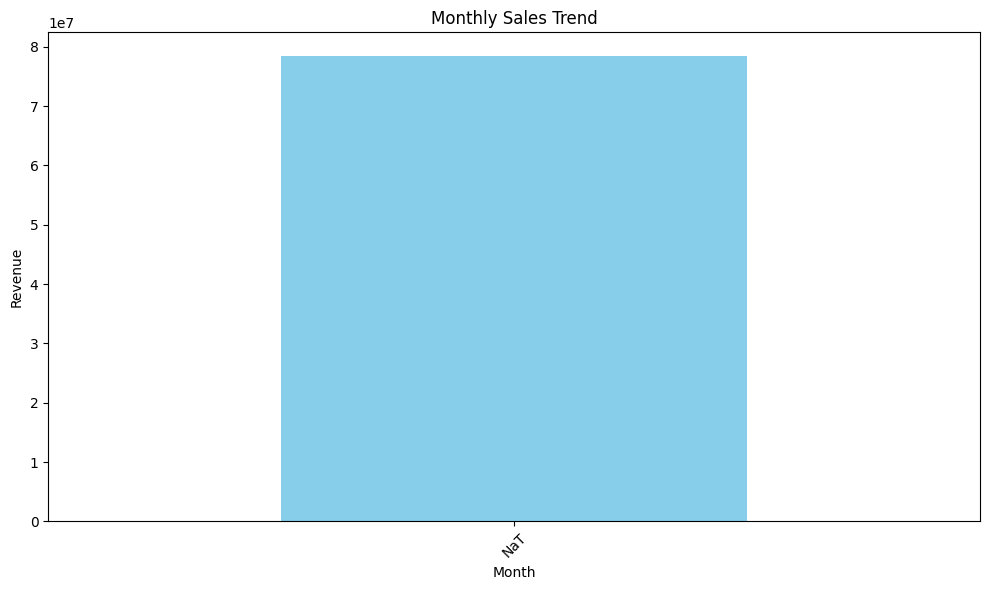

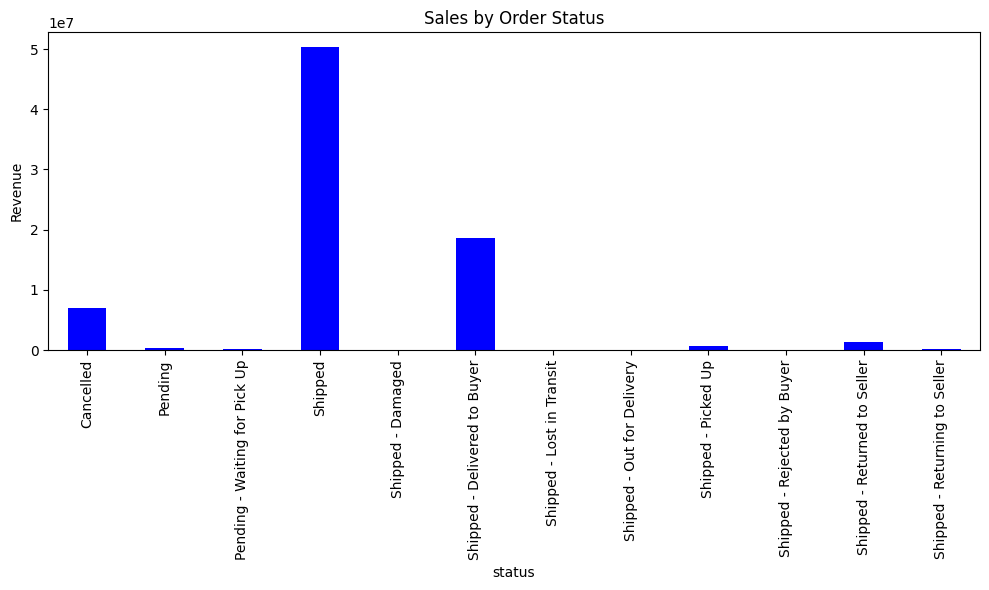

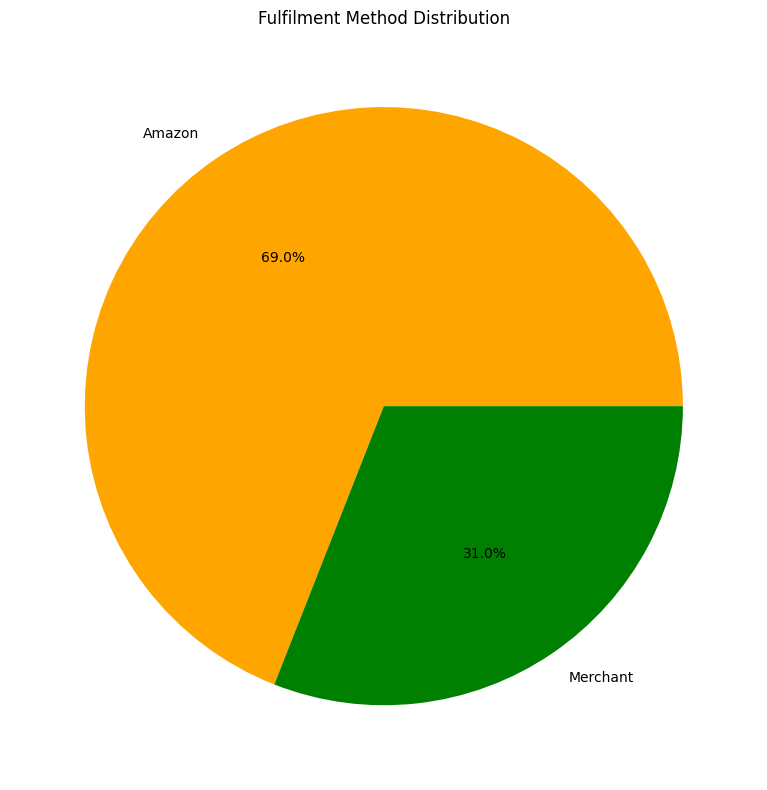

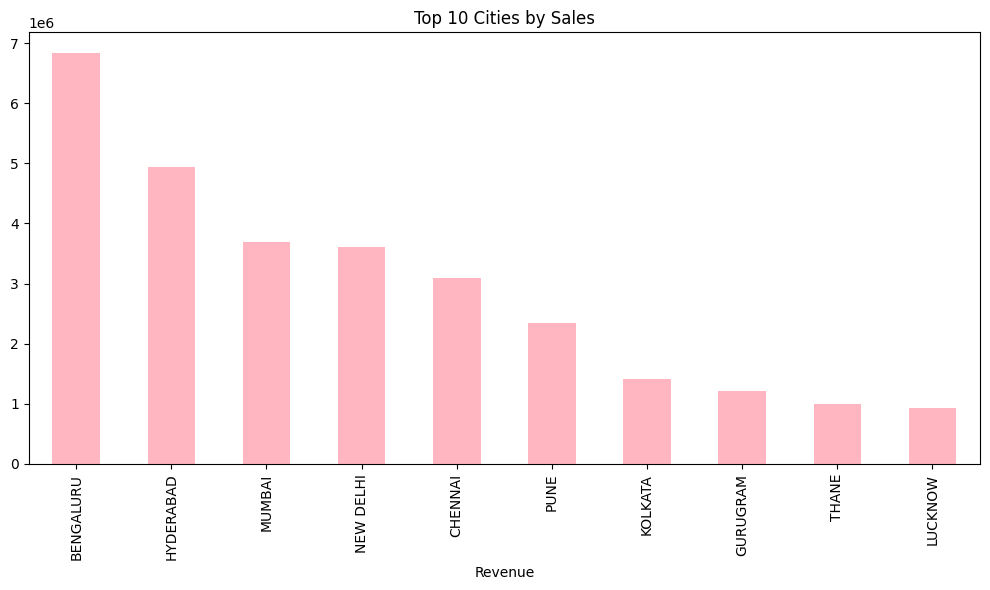

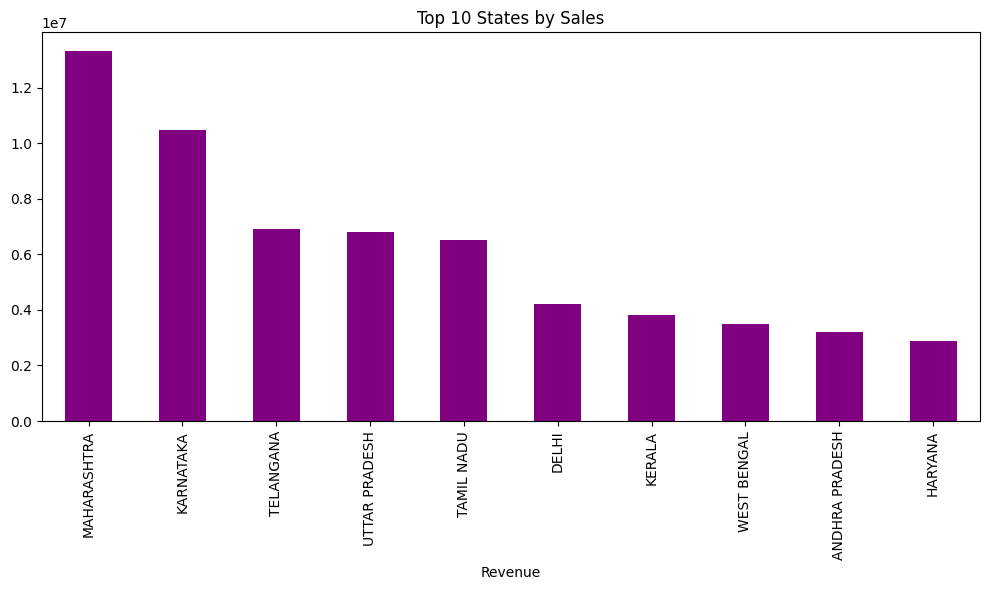

In [9]:
# Visualizations
# Top 10 Product Categories by Sales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values[:10], y=category_sales.index[:10], color='lightgreen')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', title='Monthly Sales Trend', color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sales by Order Status
plt.figure(figsize=(10, 6))
status_sales.plot(kind='bar', title='Sales by Order Status', color='blue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Fulfilment Method Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
fulfilment_orders.plot(kind='pie', autopct='%1.1f%%', title='Fulfilment Method Distribution', labels=fulfilment_orders.index, colors=['orange', 'green', 'blue'])
plt.ylabel('')
plt.tight_layout()
plt.show()

# Top 10 Cities by Sales
plt.figure(figsize=(10, 6))
ship_city_sales.head(10).plot(kind='bar', title='Top 10 Cities by Sales', color='lightpink')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

# Top 10 States by Sales
plt.figure(figsize=(10, 6))
ship_state_sales.head(10).plot(kind='bar', title='Top 10 States by Sales', color='purple')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

## Business Insights & Recommendations

In [10]:
# Business Insights & Recommendations
print("\n Business Insights")
print("- Focus on top-performing product categories such as:", category_sales.idxmax())
print("- Most sales come from cities like:", ship_city_sales.idxmax())
print("- Fulfilment method with most orders:", fulfilment_orders.idxmax())
print("- Recommend increasing marketing in high-revenue states such as:", ship_state_sales.idxmax())
print("- Consider reducing stock or rethinking strategy for slow-selling products.")


 Business Insights
- Focus on top-performing product categories such as: T-shirt
- Most sales come from cities like: BENGALURU
- Fulfilment method with most orders: Amazon
- Recommend increasing marketing in high-revenue states such as: MAHARASHTRA
- Consider reducing stock or rethinking strategy for slow-selling products.
